# Big Data Mart Sales Problem

# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('bigdatamart_Train.csv')
test=pd.read_csv('bigdatamart_Test.csv')

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# About the Columns:

1.Item identifier: The data element in the holdings statement that uniquely identifies the bibliographic item for which holdings are being reported.
    
2.Item weight: Item weight is a value assigned to a test item that expresses its percentage of the total score.
    
3.Item fat content: The amount of fat contained in the food item.
    
4.Item visibility: The ability for shoppers to discover, identify, and engage with products.
    
5.Item type: Item types define the contents of an item and the information that is stored about an item.
    
6.Item MRP: MRP of particular item.
    
7.Outlet identifier: A unique identifier assigned to each service type outlet.
    
8.Outlet Establishment year: An establishment when it was opened.
    
9.Outlet size: The Outlet or Branch size refers to the length of pipe branching off of the run.
    
10.Outlet location type: Refers to the locality or the surrounding of the outlet where it is situated.
    
11.Outlet type: Type of the outlet.
    
12.Item outlet sales: a large retail store organized into departments offering a variety of merchandise; commonly part of a retail chain. discount house, discount store, discounter, wholesale house. a sales outlet offering goods at a discounted price.

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Dropping Item identifier and outlet identifier, as they do not affect our dataset and don't have any use in furthur process.

In [9]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [10]:
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

Filling data in null places of 'Item_Weight' and 'Outlet_Size'.

In [11]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [12]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [13]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [14]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [15]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [16]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Combining data for 'Item_Fat_Content', in Low Fat and Regular class.

In [18]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':"Low Fat",'reg':'Regular'})

In [19]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Changing 'Outlet_Establishment_Year' to 'Outlet_No_year', i.e. how many years have passed since outlet has opened.

In [20]:
train['Outlet_No_year']=2021-train['Outlet_Establishment_Year']

In [21]:
test['Outlet_No_year']=2021-test['Outlet_Establishment_Year']

In [22]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_No_year
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [23]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_No_year
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,22
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,14
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,23
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,14
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,36
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,24
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,12
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1,19
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1,14


# EDA

Using distplot and scatter plot let's see how data is distributed and analyze the relationship.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

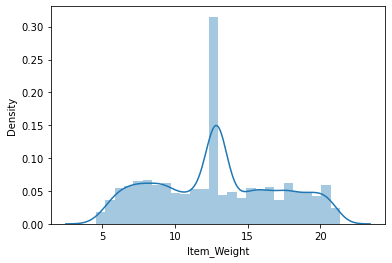

In [25]:
sns.distplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

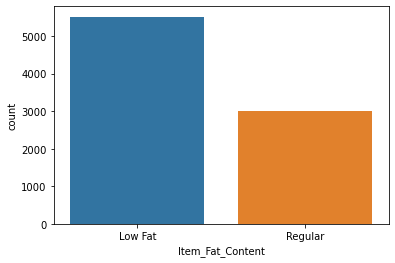

In [26]:
sns.countplot(train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

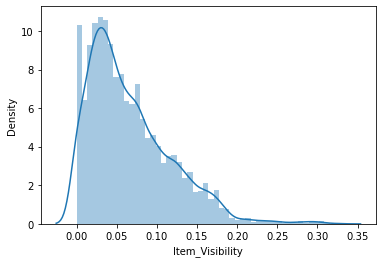

In [27]:
sns.distplot(train['Item_Visibility'])

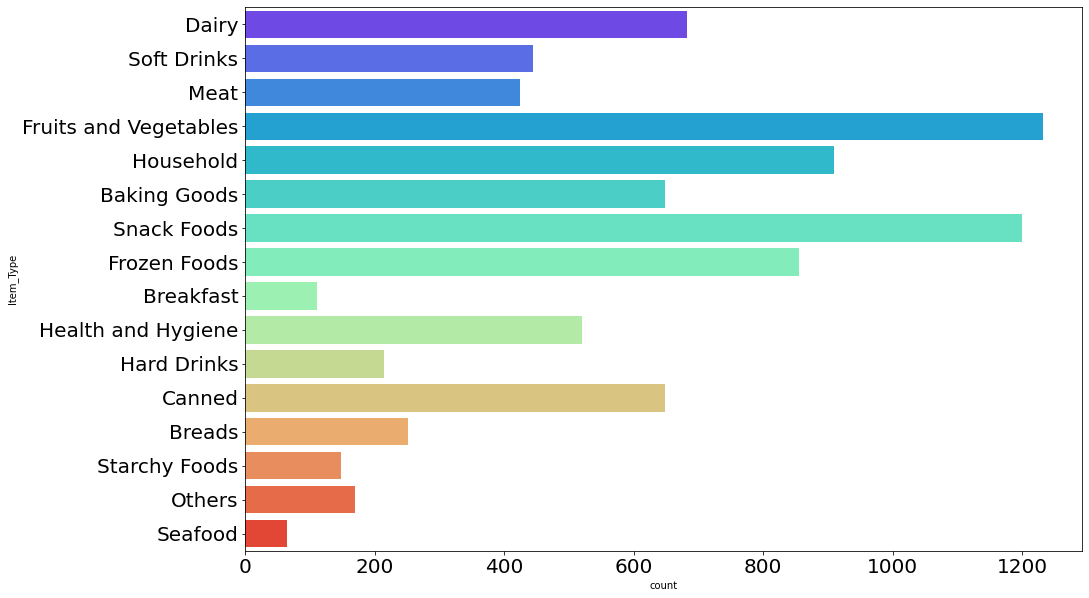

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(y=train['Item_Type'],palette='rainbow')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

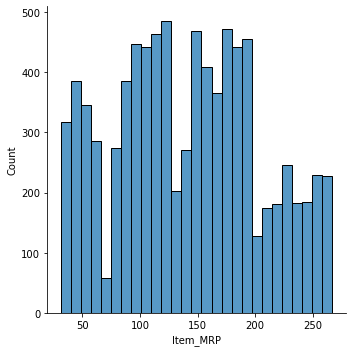

In [29]:
sns.displot(train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

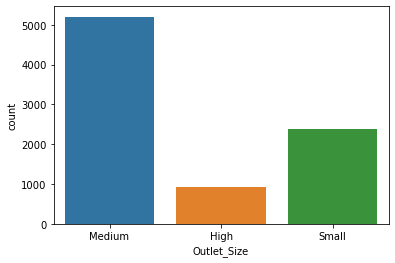

In [30]:
sns.countplot(train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

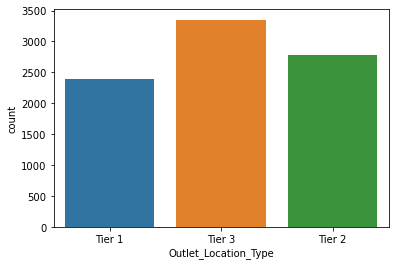

In [31]:
sns.countplot(train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

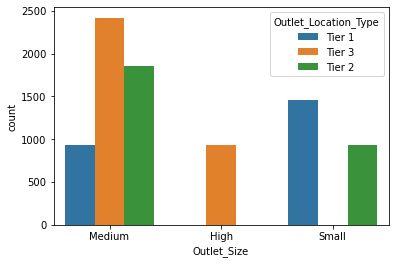

In [32]:
sns.countplot(train['Outlet_Size'],hue=train['Outlet_Location_Type'])

<AxesSubplot:xlabel='count', ylabel='Outlet_Type'>

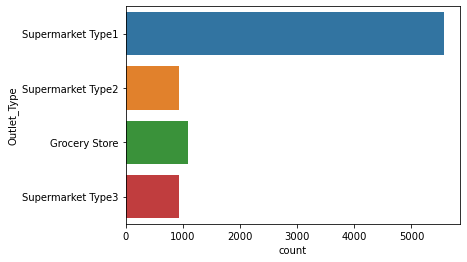

In [33]:
sns.countplot(y=train['Outlet_Type'])

Here 'Outlet_Type' is related to 'Outlet_Size', comparing these two columns.

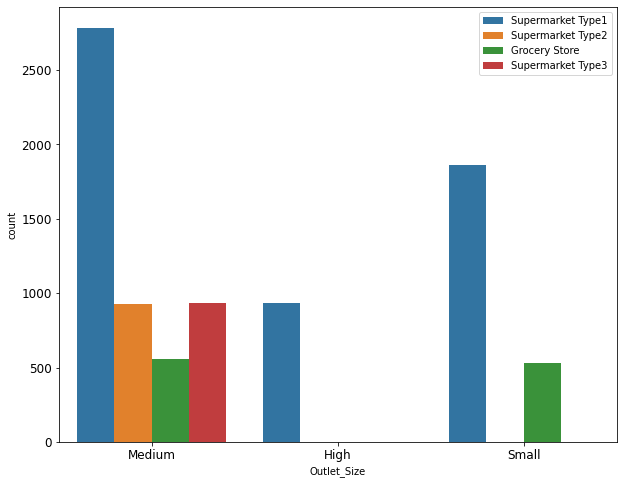

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x=train['Outlet_Size'],hue=train['Outlet_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right')
plt.show()

Comparing 'Outlet_Location_Type' and 'Outlet_Type'.

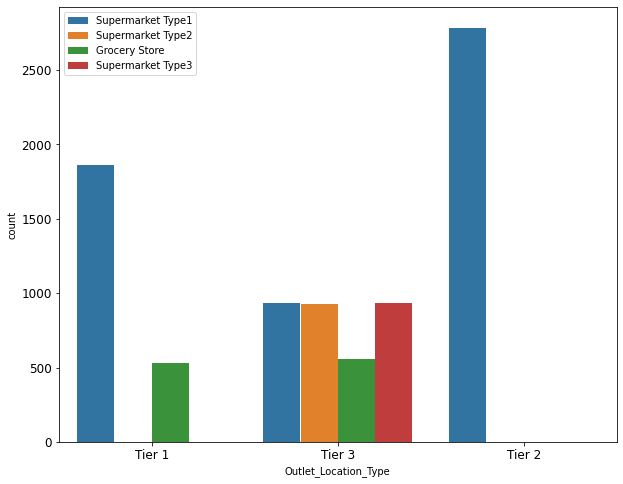

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(train['Outlet_Location_Type'],hue=train['Outlet_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.show()

Comparing 'Outlet_Type' and 'Outlet_No_year'.

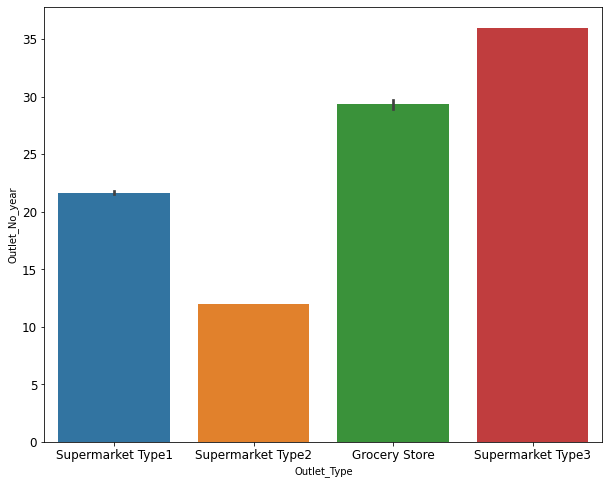

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x=train['Outlet_Type'],y=train['Outlet_No_year'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

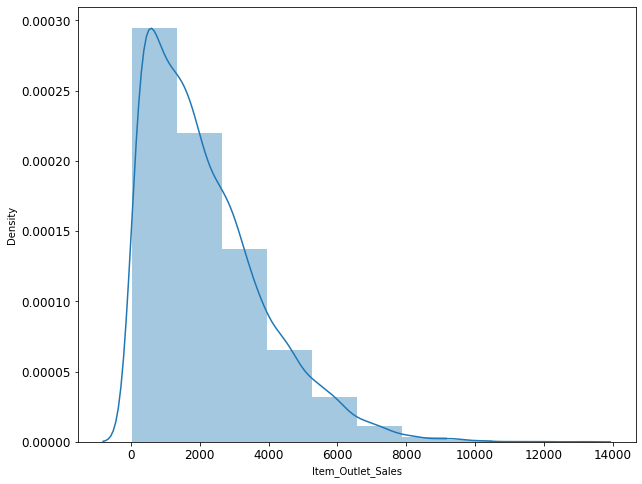

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Outlet_Sales'],bins=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

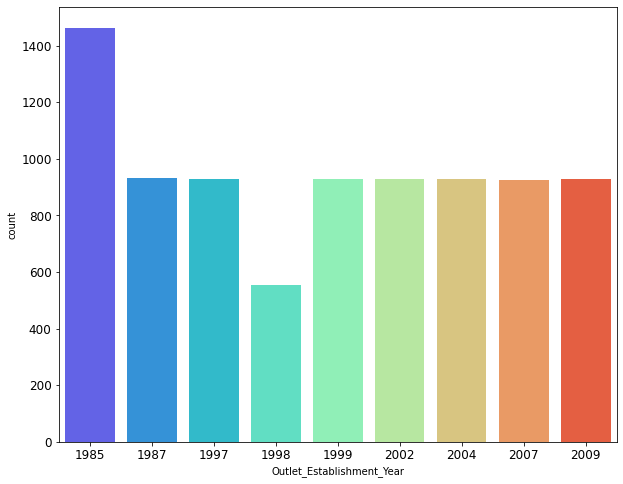

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(train['Outlet_Establishment_Year'],palette='rainbow')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Comparing 'Outlet_Establishment_Year' and 'Outlet_Location_Type'.

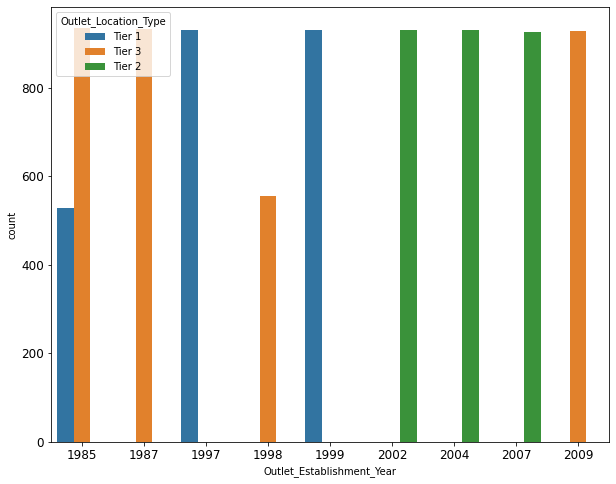

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(x=train['Outlet_Establishment_Year'],hue=train['Outlet_Location_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Comparing 'Outlet_Establishment_Year' and 'Outlet_Type'.

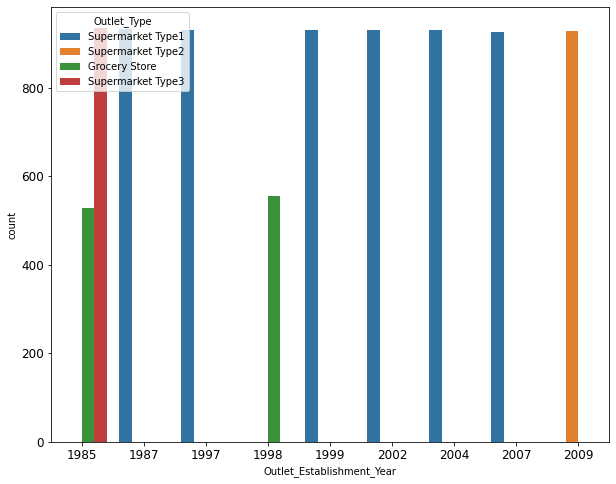

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(train['Outlet_Establishment_Year'],hue=train['Outlet_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Comparing 'Outlet_Establishment_Year' and 'Outlet_Size'.

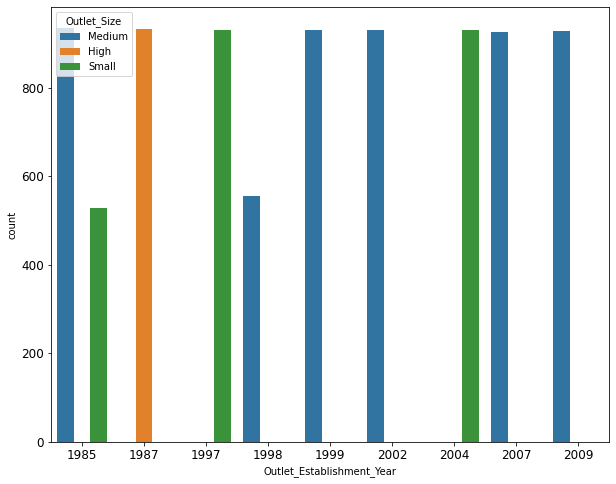

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(train['Outlet_Establishment_Year'],hue=train['Outlet_Size'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Correlation:

In [42]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_No_year
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.049135
Outlet_No_year,0.008301,0.074834,-0.005020,-1.000000,0.049135,1.000000


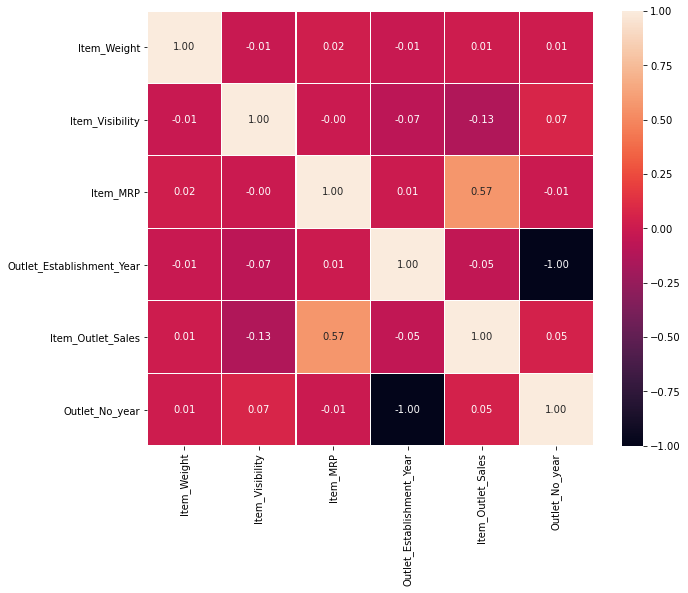

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.show()

# Outcome of Correlation:

All the columns are positively correlated with the target column.

Item_weight, Item_MRP, Item_visibility has 1, 13, 57 percent correlation with the target column which can be considered as good bond. Outlet_establishment_year and Outlet_no_year has 5 and 5 percent correlation with target column, which can be considered as good bond.

Max correlation: Item_MRP

Min correlation: Outlet_establishment_year

Dropping 'Outlet_Establishment_Year'.

In [44]:
train.drop(['Outlet_Establishment_Year'],inplace=True,axis=1)

In [45]:
test.drop(['Outlet_Establishment_Year'],inplace=True,axis=1)

In [46]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_No_year
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,23
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,34
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [47]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_No_year
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,22
1,8.300000,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,14
2,14.600000,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,23
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,14
4,12.695633,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,36
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,24
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,12
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1,19
5679,15.300000,Regular,0.000000,Canned,214.6218,Medium,Tier 2,Supermarket Type1,14


# Changing object to int values using LabelEncoder:

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
lencode=LabelEncoder()
train['Item_Fat_Content']=lencode.fit_transform(train['Item_Fat_Content'])
train['Item_Type']=lencode.fit_transform(train['Item_Type'])
train['Outlet_Size']=lencode.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=lencode.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']=lencode.fit_transform(train['Outlet_Type'])
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_No_year
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380,22
1,5.920,1,0.019278,14,48.2692,1,2,2,443.4228,12
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700,22
3,19.200,1,0.000000,6,182.0950,1,2,0,732.3800,23
4,8.930,0,0.000000,9,53.8614,0,2,1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834,34
8519,8.380,1,0.046982,0,108.1570,1,1,1,549.2850,19
8520,10.600,0,0.035186,8,85.1224,2,1,1,1193.1136,17
8521,7.210,1,0.145221,13,103.1332,1,2,2,1845.5976,12


In [50]:
test['Item_Fat_Content']=lencode.fit_transform(test['Item_Fat_Content'])
test['Item_Type']=lencode.fit_transform(test['Item_Type'])
test['Outlet_Size']=lencode.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=lencode.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=lencode.fit_transform(test['Outlet_Type'])
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_No_year
0,20.750000,1,0.007565,13,107.8622,1,0,1,22
1,8.300000,4,0.038428,4,87.3198,1,1,1,14
2,14.600000,1,0.099575,11,241.7538,1,2,0,23
3,7.315000,1,0.015388,13,155.0340,1,1,1,14
4,12.695633,2,0.118599,4,234.2300,1,2,3,36
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,2,0,1,24
5677,7.600000,2,0.142991,15,169.1448,1,2,2,12
5678,10.000000,1,0.073529,8,118.7440,1,1,1,19
5679,15.300000,2,0.000000,3,214.6218,1,1,1,14


# Describing datasets with Heatmap:

In [51]:
train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_No_year
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1.170832,1.112871,1.201220,2181.288914,23.168133
std,4.226124,0.477836,0.051598,4.209990,62.275067,0.600327,0.812757,0.796459,1706.499616,8.371760
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.290000,12.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1.000000,0.000000,1.000000,834.247400,17.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1.000000,1.000000,1.000000,1794.331000,22.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2.000000,2.000000,1.000000,3101.296400,34.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2.000000,2.000000,3.000000,13086.964800,36.000000


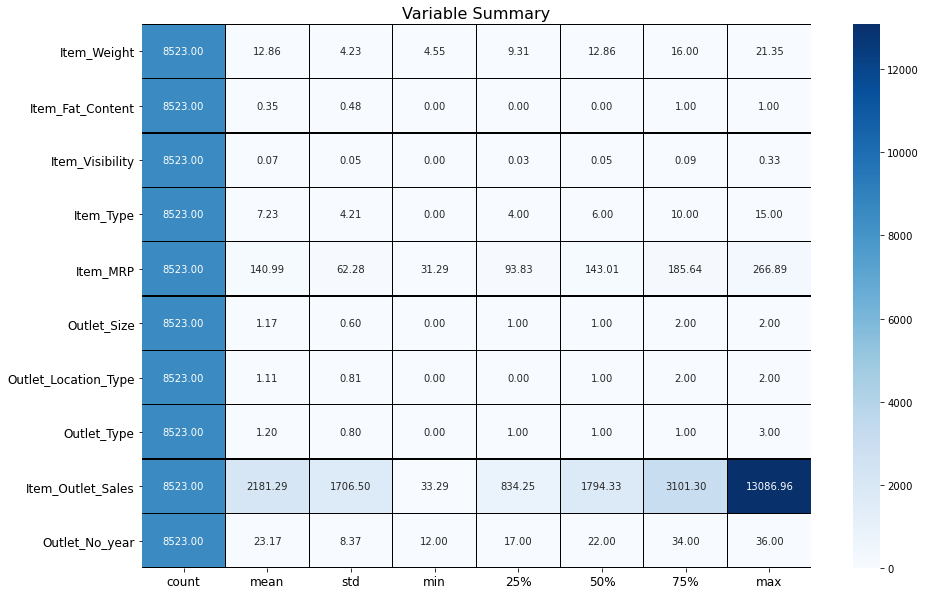

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(train.describe().transpose(),annot=True,fmt='0.2f',linewidth=0.2,cmap='Blues',linecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Variable Summary',fontsize=16)
plt.show()

# Outcome of describe of datasets:

From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help us in data cleaning.

Total number of rows and columns in dataset:

1.8523 rows

2.10 columns

Item_weight:

    1.Mean=12.86
    2.std=4.23
    3.max_value=21.35
    4.min_value=4.55
    
Item_fat_content:

    1.Mean=0.35
    2.std=0.48
    3.max_value=1.00
    4.min_value=0.00
    
Item_visibility:

    1.Mean=0.07
    2.std=0.05
    3.max_value=0.33
    4.min_value=0.00
    
Item_type:

    1.Mean=7.23
    2.std=4.21
    3.max_value=15.00
    4.min_value=0.00
    
Item_MRP:

    1.Mean=140.99
    2.std=62.28
    3.max_value=266.89
    4.min_value=31.29
    
Outlet_size:

    1.Mean=1.17
    2.std=0.60
    3.max_value=2.00
    4.min_value=0.00
    
Outlet_location_type:

    1.Mean=1.11
    2.std=0.81
    3.max_value=2.00
    4.min_value=0.00
    
Outlet_type:

    1.Mean=1.20
    2.std=0.80
    3.max_value=3.00
    4.min_value=0.00
    
Outlet_no_year:

    1.Mean=23.17
    2.std=8.37
    3.max_value=36.00
    4.min_value=12.00
    
Item_outlet_sales:

    1.Mean=2181.29
    2.std=1706.50
    3.max_value=13086.96
    4.min_value=33.29

# Using subplot and distplot to check data are normalised or not, considering mean values.

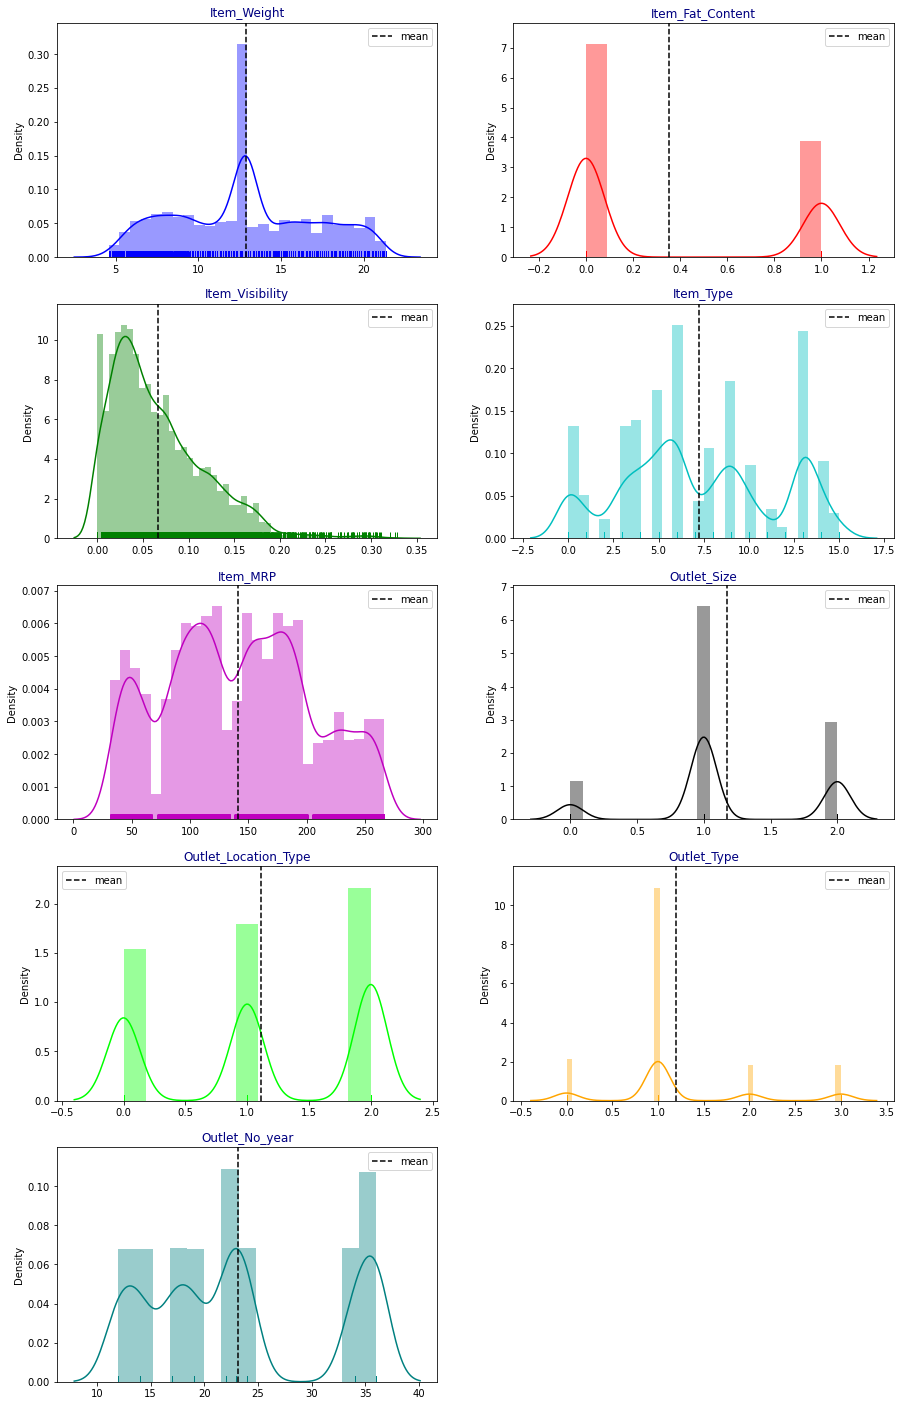

In [53]:
import itertools

cols=['Item_Weight',
     'Item_Fat_Content',
     'Item_Visibility',
     'Item_Type',
     'Item_MRP',
     'Outlet_Size',
     'Outlet_Location_Type',
     'Outlet_Type',
      'Outlet_No_year'
     ]
length=len(cols)
cs=['b','r','g','c','m','k','lime','orange','teal']
fig=plt.figure(figsize=(15,25))
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,2,j+1)
    ax=sns.distplot(train[i],color=k,rug=True)
    ax.set_facecolor('w')
    plt.axvline(train[i].mean(),linestyle='--',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel('')

# Observation:

From above we can see that data is not normalised for some features and we should proceed with the data cleaning.

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_Type'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>],
       [<AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>],
       [<AxesSubplot:title={'center':'Outlet_No_year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

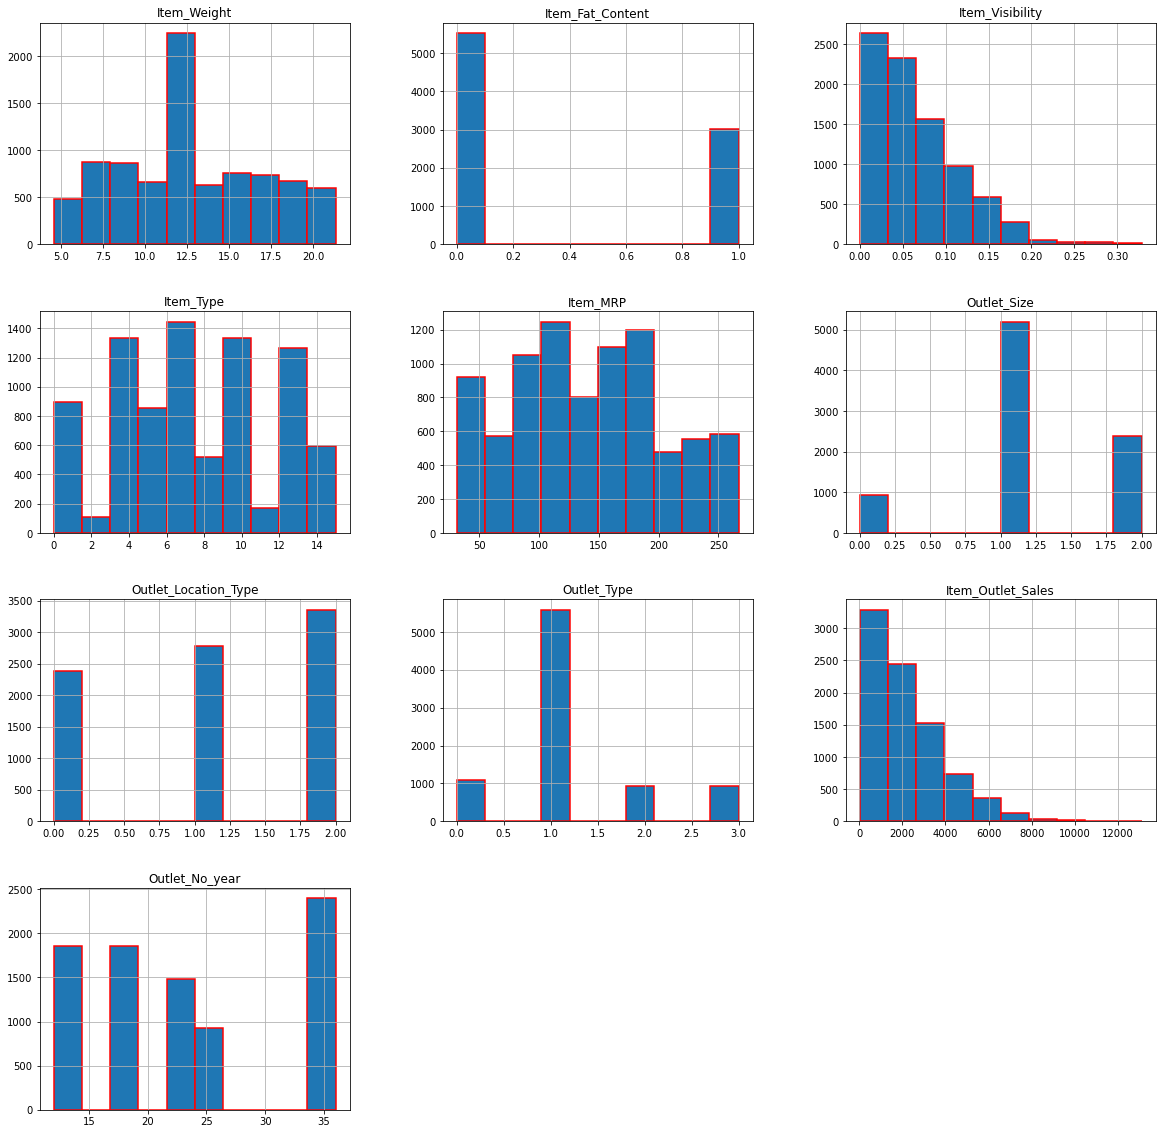

In [54]:
train.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

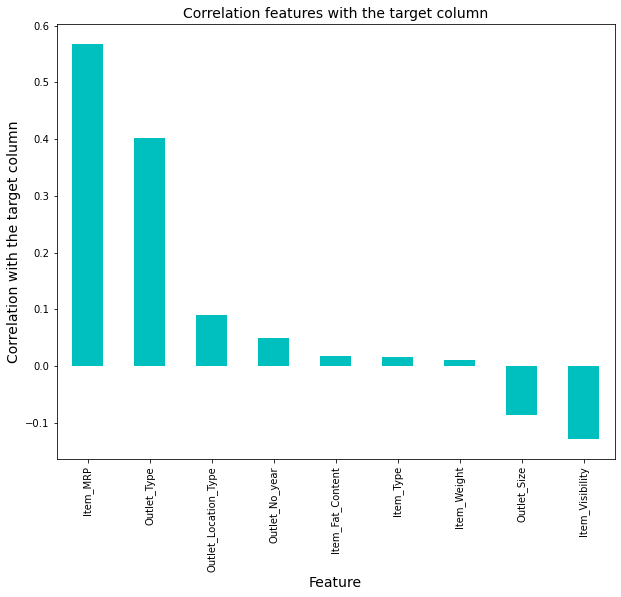

In [55]:
plt.figure(figsize=(10,8))
train.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation features with the target column',fontsize=14)
plt.show()

None is having negative correlation except 'Outlet_Size' and 'Item_Visibility'.

In [56]:
train.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_No_year          0
dtype: int64

None of the column is having NaN or NaT value.

In [57]:
train.skew()

Item_Weight             0.090561
Item_Fat_Content        0.616705
Item_Visibility         1.167091
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
Outlet_No_year          0.396641
dtype: float64

# Skewness:

We are taking Skewness threshold as +/-0.5. From the following observation, the columns which are falling under high skewness:
    
    Item_fat_content, skewness=0.616705, Item_visibility, skewness=1.167091, Outlet_type, skewness=0.927438

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int32  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int32  
 6   Outlet_Location_Type  8523 non-null   int32  
 7   Outlet_Type           8523 non-null   int32  
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_No_year        8523 non-null   int64  
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


From above we can have columns datatype and memory used by the dataframe.

# Outliers Checking:

to check outliers we are using box plot.

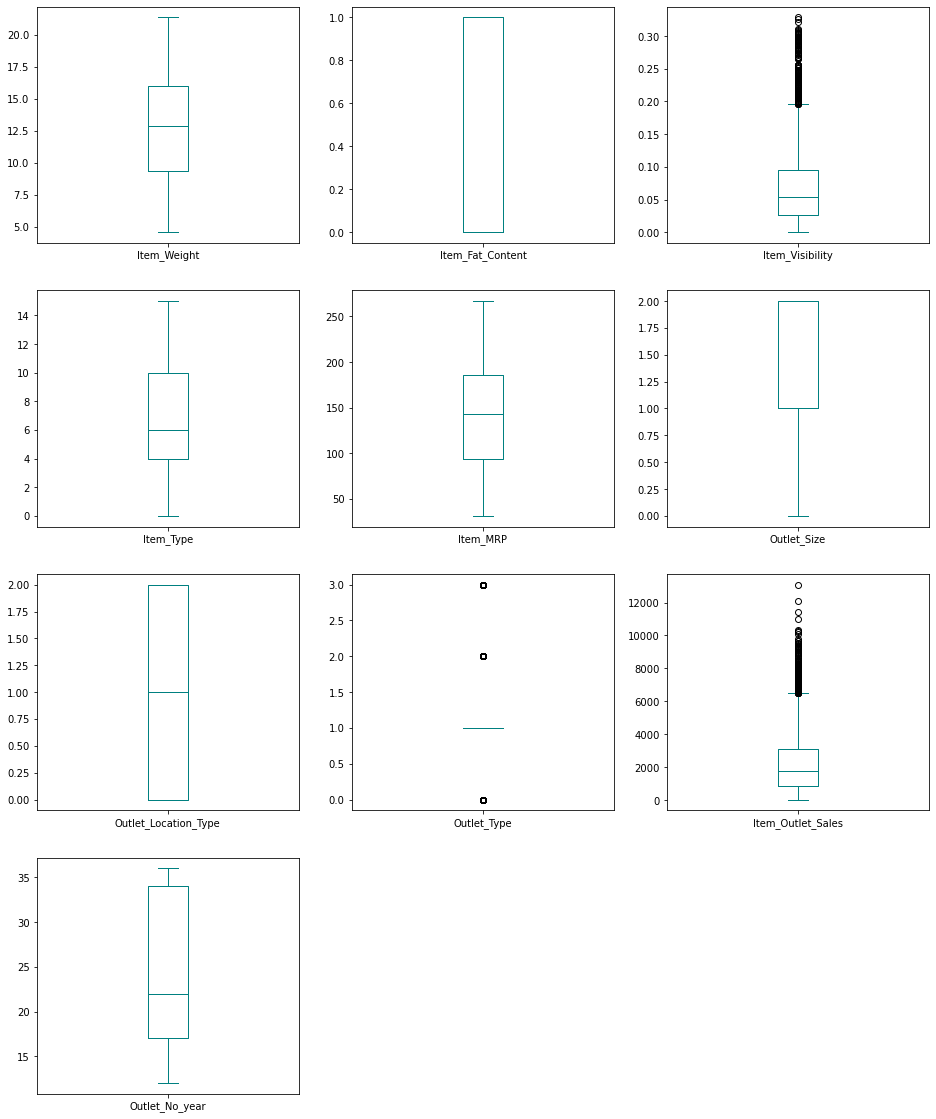

In [59]:
train.plot(kind='box',subplots=True,layout=(4,3),figsize=(16,20),color='Teal')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.show()

From above we can see that column 'Item_viibility' has more outliers, while column 'Outlet_type' has less outliers, while our target column does not come under outlier checking.

# Removing Ouliers:

Checking the percentage of data falling under outliers.

In [60]:
from scipy.stats import zscore
import numpy as np

In [61]:
z=np.abs(zscore(train))
z.shape

(8523, 10)

In [62]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [63]:
train_new=train[(z<3).all(axis=1)]
print(train.shape)
print(train_new.shape)

(8523, 10)
(8338, 10)


# Percentage Data loss

In [64]:
loss_percent=(8523-8338)/8523*100
print(loss_percent)

2.170597207556025


Percent loss is not more than 5 percent.

We will once try for IQR.

In [65]:
Q1=train.quantile(0.25)
Q3=train.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Item_Weight                6.690000
Item_Fat_Content           1.000000
Item_Visibility            0.067596
Item_Type                  6.000000
Item_MRP                  91.817200
Outlet_Size                1.000000
Outlet_Location_Type       2.000000
Outlet_Type                0.000000
Item_Outlet_Sales       2267.049000
Outlet_No_year            17.000000
dtype: float64


In [66]:
train_new1=train[-((train<(Q1-1.5*IQR)) | (train>(Q3+1.5*IQR))).any(axis=1)]
print(train_new1.shape)

(5497, 10)


In [67]:
percentage_loss=(8523-5497)/8523*100
print(percentage_loss)

35.50393054088936


Since the percentage loss in zscore is less as compared to IQR, so we will go with zscore over IQR.

# Dividing data in features and vectors:

In [68]:
x=train_new.drop(columns=['Item_Outlet_Sales'])
y=train_new['Item_Outlet_Sales']

In [69]:
x.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Outlet_No_year            int64
dtype: object

Observing relationship between features and target vectors.

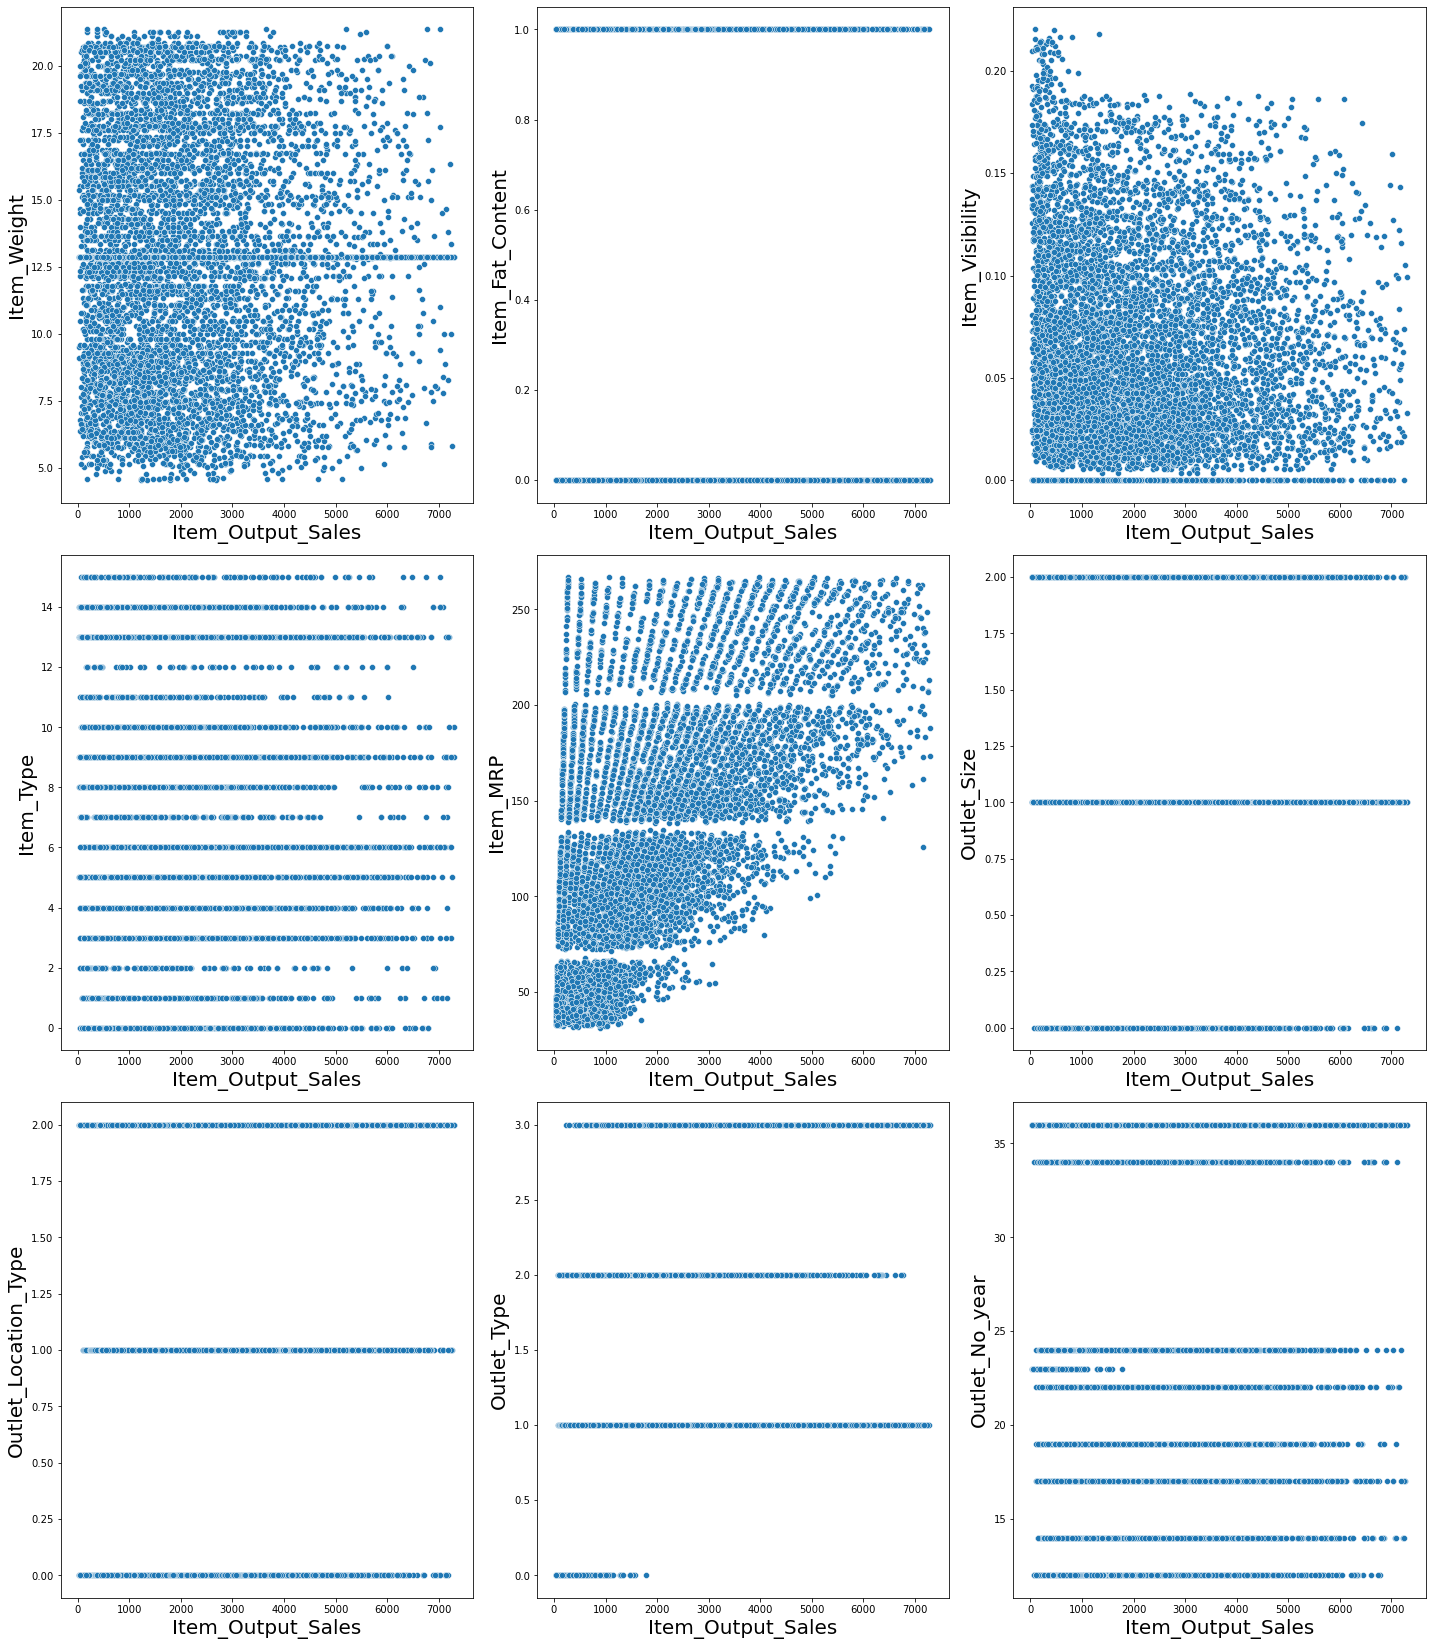

In [70]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(y,x[column])
        plt.xlabel('Item_Output_Sales',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Transforming data to remove skewness:

In [71]:
train_new.skew()

Item_Weight             0.089291
Item_Fat_Content        0.620973
Item_Visibility         0.794272
Item_Type               0.098295
Item_MRP                0.138990
Outlet_Size            -0.087933
Outlet_Location_Type   -0.202674
Outlet_Type             0.956727
Item_Outlet_Sales       0.878267
Outlet_No_year          0.423379
dtype: float64

Outcome of skewness, normal skewed data is between +/-0.5

Column which are not under the normal skewness range:

    Item_fat_content
    Item_visibility
    Outlet_type

Using power_transform to remove skewness.

In [72]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.81707423, -0.73664489, -1.14171487, ..., -1.37581641,
        -0.13467763,  0.05780928],
       [-1.72477171,  1.35750619, -1.03254239, ...,  1.09508924,
         1.05688633, -1.59379935],
       [ 1.07938519, -0.73664489, -1.1173602 , ..., -1.37581641,
        -0.13467763,  0.05780928],
       ...,
       [-0.49268289, -0.73664489, -0.53817461, ..., -0.12639076,
        -0.13467763, -0.64714621],
       [-1.36554488,  1.35750619,  1.53555717, ...,  1.09508924,
         1.05688633, -1.59379935],
       [ 0.48935138, -0.73664489, -0.26902392, ..., -1.37581641,
        -0.13467763,  0.29603544]])

Applying Standard Scaler:

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-0.81707423, -0.73664489, -1.14171487, ..., -1.37581641,
        -0.13467763,  0.05780928],
       [-1.72477171,  1.35750619, -1.03254239, ...,  1.09508924,
         1.05688633, -1.59379935],
       [ 1.07938519, -0.73664489, -1.1173602 , ..., -1.37581641,
        -0.13467763,  0.05780928],
       ...,
       [-0.49268289, -0.73664489, -0.53817461, ..., -0.12639076,
        -0.13467763, -0.64714621],
       [-1.36554488,  1.35750619,  1.53555717, ...,  1.09508924,
         1.05688633, -1.59379935],
       [ 0.48935138, -0.73664489, -0.26902392, ..., -1.37581641,
        -0.13467763,  0.29603544]])

In [74]:
y.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1230.3984    14
             ..
1883.5482     1
5386.9878     1
4231.8248     1
91.2146       1
3653.9104     1
Name: Item_Outlet_Sales, Length: 3388, dtype: int64

In [75]:
print(x_t.shape)
print(y.shape)

(8338, 9)
(8338,)


# Regression Model Building:

# Linear Regression:

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [77]:
lr=LinearRegression()
max_scr=0
for i in range(0,10000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,'The model performs well')
        print('At random state:-',i)
        print('Training score is:-',r2_score(y_train,pred_train)*100)
        print('Testing score is:-',r2_score(y_test,pred_test)*100)

At random state 73 The model performs well
At random state:- 73
Training score is:- 51.717828139250656
Testing score is:- 51.72393398490953
At random state 667 The model performs well
At random state:- 667
Training score is:- 51.72345685329878
Testing score is:- 51.72367170005992
At random state 990 The model performs well
At random state:- 990
Training score is:- 51.70046946505747
Testing score is:- 51.701256582702406
At random state 1398 The model performs well
At random state:- 1398
Training score is:- 51.704441575473716
Testing score is:- 51.69834703724278
At random state 1524 The model performs well
At random state:- 1524
Training score is:- 51.71539936831064
Testing score is:- 51.72139619531655
At random state 2844 The model performs well
At random state:- 2844
Training score is:- 51.711695897467344
Testing score is:- 51.71489728658204
At random state 3084 The model performs well
At random state:- 3084
Training score is:- 51.71665598216325
Testing score is:- 51.71925873571529
At 

In [78]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_t,y,random_state=3476,test_size=0.20)

We are using random state 3476, as at random state 9884, it is giving highest accuracy.

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Regularization

# 1.Lasso:

In [80]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
grid_search=GridSearchCV(ls,parameters)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'alpha': 1, 'random_state': 0}


In [81]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls=ls.predict(x_test_b)

lss=r2_score(y_test_b,pred_ls)
for i in range(2,20):
    lsscore=cross_val_score(ls,x_t,y,cv=i)
    lsc=lsscore.mean()
    print('At cv:-',i)
    print('cross validation score is:-',lsc*100)
    print('r2_score is:-',lss*100)
    print('\n')

At cv:- 2
cross validation score is:- 51.636545737134384
r2_score is:- 51.715299525686945


At cv:- 3
cross validation score is:- 51.58452677141473
r2_score is:- 51.715299525686945


At cv:- 4
cross validation score is:- 51.50071740656064
r2_score is:- 51.715299525686945


At cv:- 5
cross validation score is:- 51.554951099274824
r2_score is:- 51.715299525686945


At cv:- 6
cross validation score is:- 51.594061913925856
r2_score is:- 51.715299525686945


At cv:- 7
cross validation score is:- 51.601070897398614
r2_score is:- 51.715299525686945


At cv:- 8
cross validation score is:- 51.55041971679648
r2_score is:- 51.715299525686945


At cv:- 9
cross validation score is:- 51.560666443220946
r2_score is:- 51.715299525686945


At cv:- 10
cross validation score is:- 51.5637189854363
r2_score is:- 51.715299525686945


At cv:- 11
cross validation score is:- 51.56870415384031
r2_score is:- 51.715299525686945


At cv:- 12
cross validation score is:- 51.548224922043794
r2_score is:- 51.715299525

In [82]:
print('At cv:-',2)
print('cross validation score is:-',51.63654)
print('r2_score is:-',51.71529)

At cv:- 2
cross validation score is:- 51.63654
r2_score is:- 51.71529


In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [84]:
print('Error')
print('mean absolute error:',mean_absolute_error(y_test_b,pred_ls))
print('mean squared error:',mean_squared_error(y_test_b,pred_ls))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error
mean absolute error: 848.1815409539139
mean squared error: 1215093.4368323374
root mean squared error: 1102.312767245457


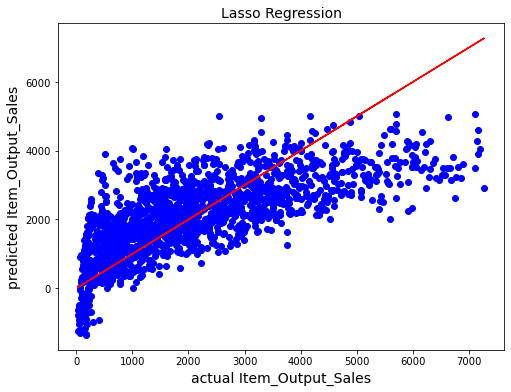

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_ls,color='b')
plt.plot(y_test_b,y_test_b,color='r')
plt.xlabel('actual Item_Output_Sales',fontsize=14)
plt.ylabel('predicted Item_Output_Sales',fontsize=14)
plt.title('Lasso Regression',fontsize=14)
plt.show()

# 2.Ridge:

In [86]:
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)

{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [87]:
rd=Ridge(alpha=10,copy_X=True,fit_intercept=True,normalize=False,random_state=0,tol=0.001)
rd.fit(x_train_b,y_train_b)
pred_rd=rd.predict(x_test_b)
rds=r2_score(y_test_b,pred_rd)
print('r2 score is:',rds*100)
rdscore=cross_val_score(rd,x_t,y,cv=2)
rdc=rdscore.mean()
print('cross validation score is:',rdc*100)

r2 score is: 51.718592470225346
cross validation score is: 51.63303506526151


In [88]:
print('Error')
print('mean absolute error:',mean_absolute_error(y_test_b,pred_rd))
print('mean squared error:',mean_squared_error(y_test_b,pred_rd))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error
mean absolute error: 848.1166248849833
mean squared error: 1215010.5692726935
root mean squared error: 1102.2751785614578


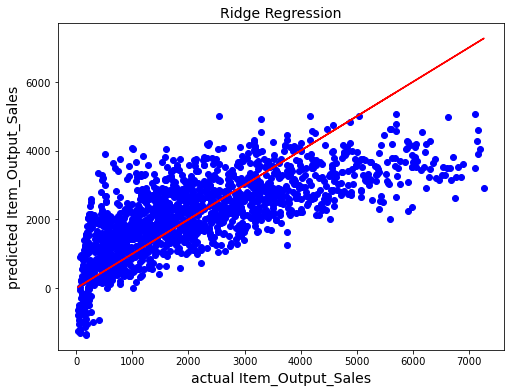

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_rd,color='b')
plt.plot(y_test_b,y_test_b,color='r')
plt.xlabel('actual Item_Output_Sales',fontsize=14)
plt.ylabel('predicted Item_Output_Sales',fontsize=14)
plt.title('Ridge Regression',fontsize=14)
plt.show()

# Ensemble Techniques:

In [90]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random'],}
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [107]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
dtr.fit(x_train_b,y_train_b)
dtr.score(x_train_b,y_train_b)
pred_dtr=dtr.predict(x_test_b)
dts=r2_score(y_test_b,pred_dtr)
print('r2_score is:',dts*100)

dtscore=cross_val_score(dtr,x_t,y,cv=2)
dtc=dtscore.mean()
print('cross validation score is:',dtc*100)

r2_score is: 7.082796673976599
cross validation score is: 14.158074769034156


In [108]:
print('Error')
print('mean absolute error:',mean_absolute_error(y_test_b,pred_dtr))
print('mean squared error:',mean_squared_error(y_test_b,pred_dtr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test_b,pred_dtr)))

Error
mean absolute error: 1071.241065467626
mean squared error: 2338278.6435701326
root mean squared error: 1529.143107616201


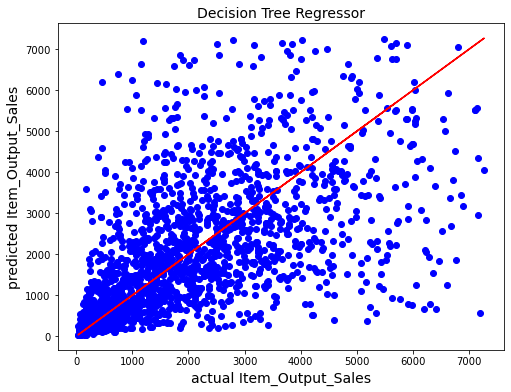

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_dtr,color='b')
plt.plot(y_test_b,y_test_b,color='r')
plt.xlabel('actual Item_Output_Sales',fontsize=14)
plt.ylabel('predicted Item_Output_Sales',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=14)
plt.show()

In [94]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 300}


In [95]:
rf=RandomForestRegressor(criterion='mae',n_estimators=300)
rf.fit(x_train_b,y_train_b)
rf.score(x_train_b,y_train_b)
pred_rf=rf.predict(x_test_b)
rfs=r2_score(y_test_b,pred_rf)
print('r2_score is:',rfs*100)

rfscore=cross_val_score(rf,x_t,y,cv=2)
rfc=rfscore.mean()
print('cross validation score is:',rfc*100)

r2_score is: 54.86690325209036
cross validation score is: 54.10316514961193


In [96]:
print('Error')
print('mean absolute error:',mean_absolute_error(y_test_b,pred_rf))
print('mean squared error:',mean_squared_error(y_test_b,pred_rf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test_b,pred_rf)))

Error
mean absolute error: 767.5399985579536
mean squared error: 1135782.744918936
root mean squared error: 1065.7310847108363


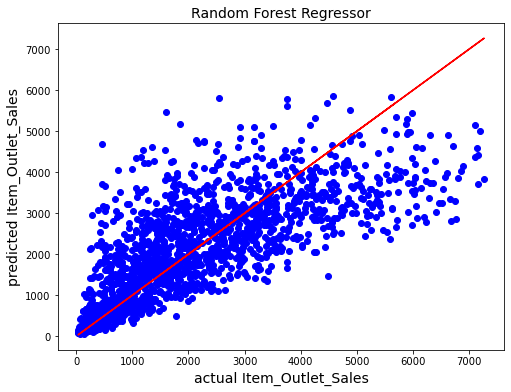

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_rf,color='b')
plt.plot(y_test_b,y_test_b,color='r')
plt.xlabel('actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('predicted Item_Outlet_Sales',fontsize=14)
plt.title('Random Forest Regressor',fontsize=14)
plt.show()

In [98]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 50}


In [99]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=50)
gbr.fit(x_train_b,y_train_b)
gbr.score(x_train_b,y_train_b)
pred_gbr=gbr.predict(x_test_b)
gbrs=r2_score(y_test_b,pred_gbr)
print('r2_score is:',gbrs*100)

gbrscore=cross_val_score(gbr,x_t,y,cv=2)
gbrc=rfscore.mean()
print('cross validation score is:',gbrc*100)

r2_score is: 58.67326328782778
cross validation score is: 54.10316514961193


In [100]:
print('Error')
print('mean absolute error:',mean_absolute_error(y_test_b,pred_gbr))
print('mean squared error:',mean_squared_error(y_test_b,pred_gbr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test_b,pred_gbr)))

Error
mean absolute error: 739.2796236891776
mean squared error: 1039994.9891244073
root mean squared error: 1019.8014459317104


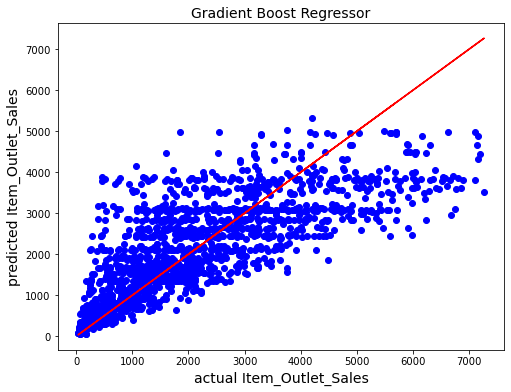

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_gbr,color='b')
plt.plot(y_test_b,y_test_b,color='r')
plt.xlabel('actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('predicted Item_Outlet_Sales',fontsize=14)
plt.title('Gradient Boost Regressor',fontsize=14)
plt.show()

In [102]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'],'gamma':['auto','scale']}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'gamma': 'auto', 'kernel': 'linear'}


In [103]:
sv = SVR(kernel = 'linear', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_sv = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_sv)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x_t,y,cv=2)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 47.72489439799054
Cross Val Score: 45.24522537085626


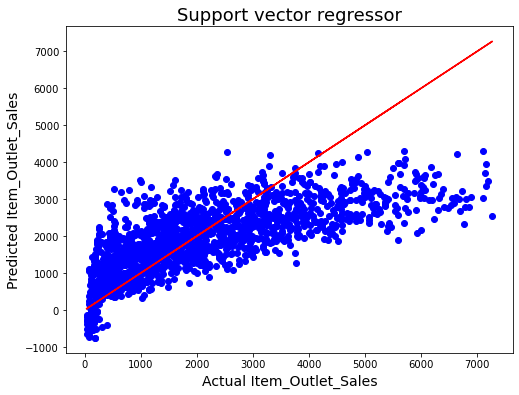

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_sv, color='b')
plt.plot(y_test_b,y_test_b, color='r')
plt.xlabel('Actual Item_Outlet_Sales',fontsize=14)
plt.ylabel('Predicted Item_Outlet_Sales',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is Lasso.Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving:

In [105]:
import pickle
filename='inhouse_Big Data Mart Sales_project.pk7'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [106]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test_b))
train_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
train_com

,original,predicted
0,601.2174,1643.056801
1,3020.0688,5610.143986
2,153.1340,2139.932245
3,4427.5700,3468.937844
4,4036.7454,2252.252705
...,...,...
1663,3004.0896,587.195652
1664,579.2460,420.707923
1665,818.9340,1670.292460
1666,4506.1344,2997.458232
